# Methodology and study procedure are described well. (2P)
### Participants: 

Three Students aged 24, 24 and 26, were recruited for a Fitts Law Study of different input devices. The Participants all had experience using a touchpad and mouse as an input device, one participant developed the pointing device and therefor had some prior experience using it(P3).

### Experiment Setup:
The study was conducted in a controlled environment to external variables impact on the results.
A Lenovo ThinkPad L13 Yoga Gen Notebook was used for the Study (13" Screen) with the builtin 1080p webcam being used for the pointing device, the builtin touchpad was used as another input device. A Razer Basilisk V3 X Hyperspeed was used at 800dpi for the mouse inputs on a standard mousepad. For the pointing device a pointing detection python script using the integrated webcam based on googles mediapipe was used which tracked the index finger of participants for cursor movement and detected left-clicking through a touching of the palm with the other fingers.

### Procedure:
The participants were first explained the study design and verbal consent was acquired. Then each participant performed a Fitts Law task with each of the input devices in a random order. Each input condition consisted of 9 different constellations of different target circle diameters and the distance of the targets to each other. With each constellation needing 10 clicks to complete(90 per device). Before the pointing device condition started the participants were instructed on how to use it and were allowed to practice on the Desktop for a few minutes. 

### Data:
The Data that was collected consisted of the time inbetween target clicks (movement time) and how many missed clicks occurred(accuracy) while also tracking the index of difficulty ( distance of targets and target size) .




# Data of at least three participants is captured appropriatly. (3P)

already done

# Results are reported, compared, and discussed well. (2P)
Michael

In [146]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import math
import numpy as np

#load csv
df1 = pd.read_csv('fittslaw_1.csv')     # participant 1
df2 = pd.read_csv('fittslaw_2.csv')     # participant 2
df3 = pd.read_csv('fittslaw_3.csv')     # participant 3

#dataframes
df1['Participant ID'] = 1
df2['Participant ID'] = 2
df3['Participant ID'] = 3
df = pd.concat([df1, df2, df3], ignore_index=True)

#converts otherwise error
df['Click Times'] = df['Click Times'].apply(lambda x: json.loads(x))

#new rows
df['ID'] = df.apply(lambda row: math.log2(2 * row['Distance'] / row['Radius']), axis=1)
df['Accuracy'] = ((df['Total Clicks'] - df['Missed Clicks']) / df['Total Clicks']) * 100
df['Hits'] = df['Total Clicks'] - df['Missed Clicks']

#input devices
mouse_data = df[df['Input Device'] == 'mouse']
touchpad_data = df[df['Input Device'] == 'touchpad']
mouselatency_data = df[df['Input Device'] == 'mouselatency']
pointing_data = df[df['Input Device'] == 'pointing']

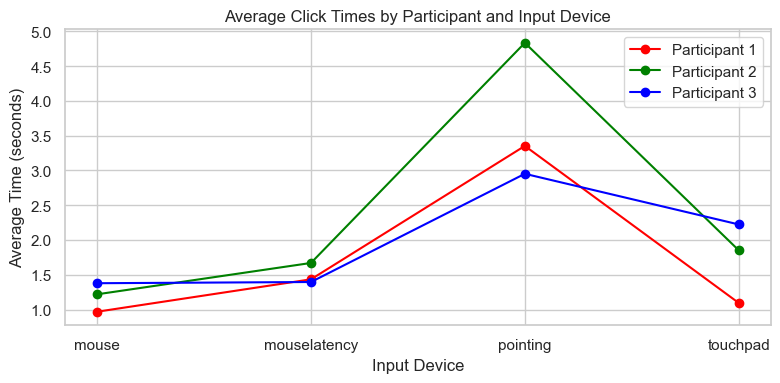

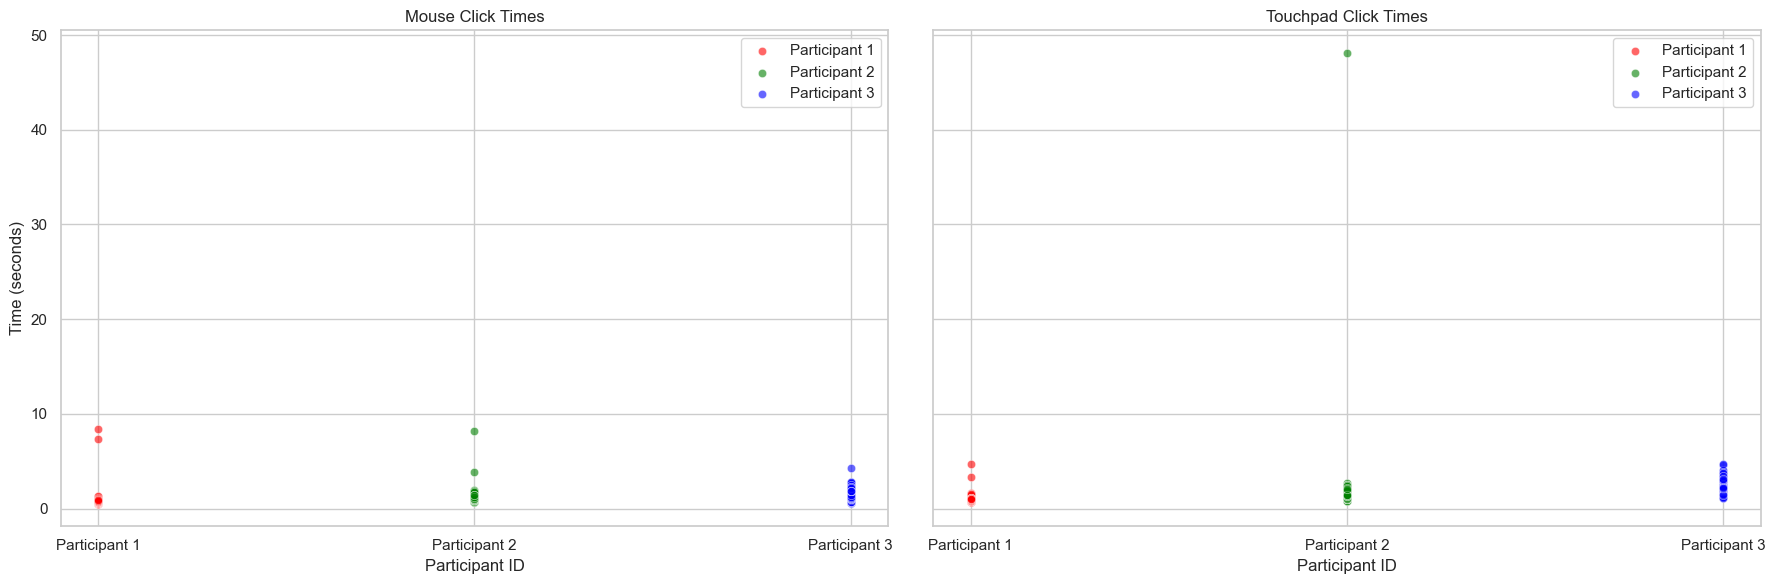

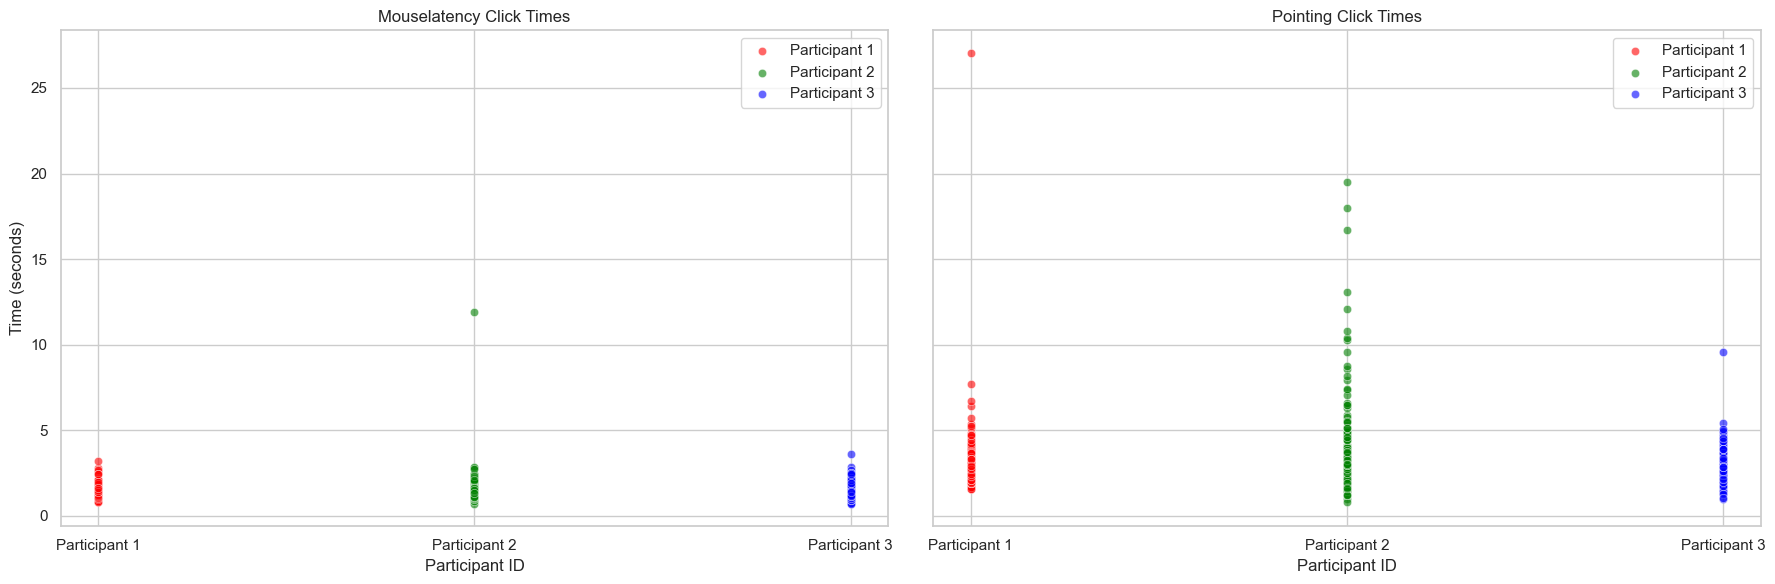

In [147]:
#with the help of chatgpt
#scatter plots
def prepare_scatter_data(device_data):
    scatter_data = []
    for idx, row in device_data.iterrows():
        participant_id = row['Participant ID']
        click_times = row['Click Times']
        scatter_data.extend([(participant_id, click_time) for click_time in click_times])
    return scatter_data

mouse_scatter_data = prepare_scatter_data(mouse_data)
touchpad_scatter_data = prepare_scatter_data(touchpad_data)
mouselatency_scatter_data = prepare_scatter_data(mouselatency_data)
pointing_scatter_data = prepare_scatter_data(pointing_data)

def plot_side_by_side(scatter_data1, device_name1, scatter_data2, device_name2):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    colors = {1: 'red', 2: 'green', 3: 'blue'}
    labels = {1: 'Participant 1', 2: 'Participant 2', 3: 'Participant 3'}

    #first scatter plot
    for participant_id, color in colors.items():
        x = [participant_id] * sum(1 for pid, _ in scatter_data1 if pid == participant_id)
        y = [click_time for pid, click_time in scatter_data1 if pid == participant_id]
        axes[0].scatter(x, y, color=color, label=labels[participant_id], alpha=0.6, edgecolors='w', linewidth=0.5)
    axes[0].set_xticks([1, 2, 3])
    axes[0].set_xticklabels(['Participant 1', 'Participant 2', 'Participant 3'])
    axes[0].set_title(f'{device_name1.capitalize()} Click Times')
    axes[0].set_xlabel('Participant ID')
    axes[0].set_ylabel('Time (seconds)')
    axes[0].legend()

    #second scatter plot
    for participant_id, color in colors.items():
        x = [participant_id] * sum(1 for pid, _ in scatter_data2 if pid == participant_id)
        y = [click_time for pid, click_time in scatter_data2 if pid == participant_id]
        axes[1].scatter(x, y, color=color, label=labels[participant_id], alpha=0.6, edgecolors='w', linewidth=0.5)
    axes[1].set_xticks([1, 2, 3])
    axes[1].set_xticklabels(['Participant 1', 'Participant 2', 'Participant 3'])
    axes[1].set_title(f'{device_name2.capitalize()} Click Times')
    axes[1].set_xlabel('Participant ID')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

#-----------
#overview 
def calculate_average_times(click_times):
    total_sum = sum(click_times, [])
    num_elements = len(total_sum)
    if num_elements > 0:
        return sum(total_sum) / num_elements
    else:
        return 0
#grouping
avg_times = df.groupby(['Participant ID', 'Input Device'])['Click Times'].apply(calculate_average_times).reset_index()

#average plot
def plot_average_times(avg_times):
    fig, ax = plt.subplots(figsize=(8, 4))
    colors = {1: 'red', 2: 'green', 3: 'blue'}
    labels = {1: 'Participant 1', 2: 'Participant 2', 3: 'Participant 3'}

    for participant_id in [1, 2, 3]:
        participant_data = avg_times[avg_times['Participant ID'] == participant_id]
        x = list(range(len(participant_data)))
        y = participant_data['Click Times']
        ax.plot(x, y, marker='o', linestyle='-', color=colors[participant_id], label=labels[participant_id])

    ax.set_xticks(range(len(avg_times['Input Device'].unique())))
    ax.set_xticklabels(avg_times['Input Device'].unique())
    ax.set_xlabel('Input Device')
    ax.set_ylabel('Average Time (seconds)')
    ax.set_title('Average Click Times by Participant and Input Device')
    ax.legend()

    plt.tight_layout()
    plt.show()

#plots
plot_average_times(avg_times)
plot_side_by_side(mouse_scatter_data, 'mouse', touchpad_scatter_data, 'touchpad')
plot_side_by_side(mouselatency_scatter_data, 'mouselatency', pointing_scatter_data, 'pointing')




### movement time participants and movement time input device 

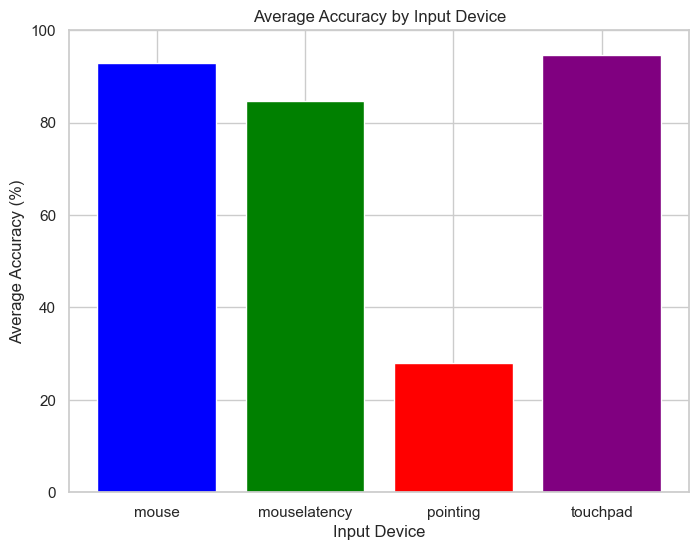

In [158]:
#grouping
avg_accuracy = df.groupby('Input Device')['Accuracy'].mean().reset_index()

#plots accuracy
def plot_average_accuracy(avg_accuracy):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(avg_accuracy['Input Device'], avg_accuracy['Accuracy'], color=['blue', 'green', 'red', 'purple'])
    ax.set_xlabel('Input Device')
    ax.set_ylabel('Average Accuracy (%)')
    ax.set_title('Average Accuracy by Input Device')
    ax.set_ylim(0, 100)
    plt.show()

plot_average_accuracy(avg_accuracy)

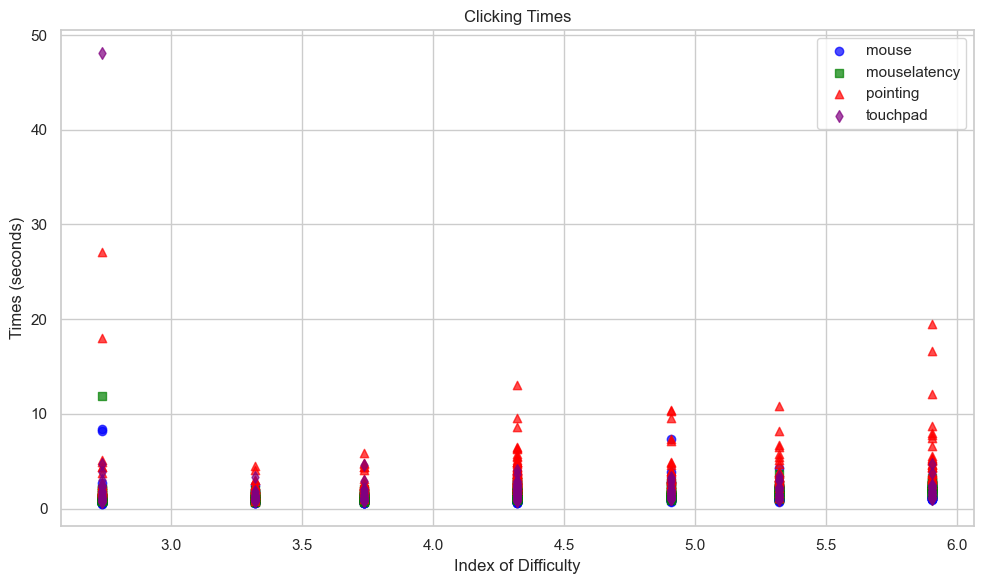

/var/folders/wj/cd2_f76n3md0d2jdcc71sjw40000gn/T/ipykernel_3640/1609618580.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_click_times = df.groupby(['Input Device', 'ID']).apply(calculate_avg_click_times).reset_index(name='Average Click Time')


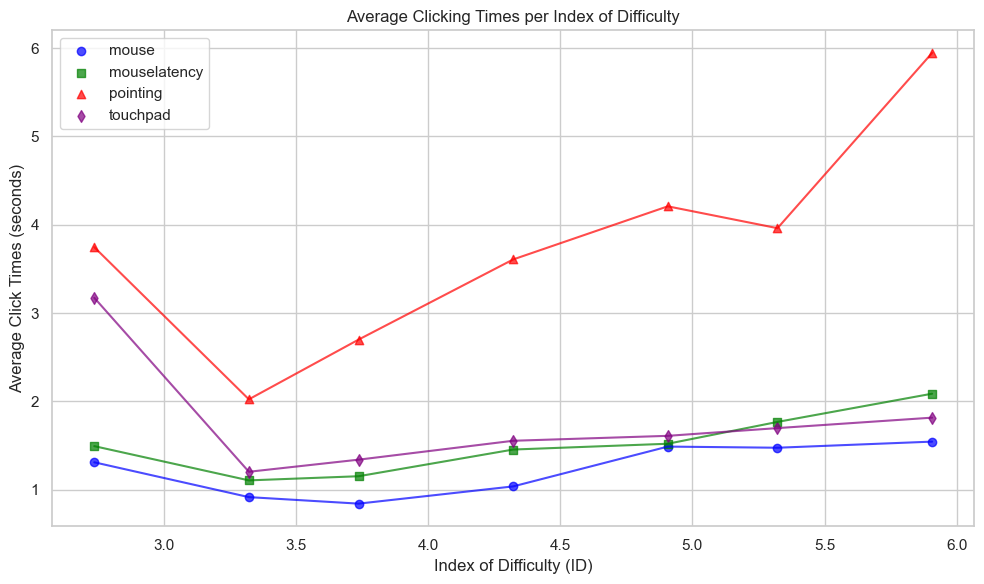

In [163]:
# Plotting

# Function to flatten nested lists 
#chat gpt
def flatten(lst):
    return [item for sublist in lst for item in sublist]

plt.figure(figsize=(10, 6))

# Define markers and colors for each device
markers = ['o', 's', '^', 'd']
colors = ['blue', 'green', 'red', 'purple']

for i, (device, group) in enumerate(df.groupby('Input Device')):
    flattened_click_times = flatten(group['Click Times'])
    ids = group['ID'].repeat(group['Total Clicks'] - group['Missed Clicks']).reset_index(drop=True)
    plt.scatter(ids, flattened_click_times, label=device, alpha=0.7, marker=markers[i], color=colors[i])

plt.title('Clicking Times')
plt.xlabel('Index of Difficulty')
plt.ylabel('Times (seconds)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
#------------------
# Function to calculate average click times per ID for each device
def calculate_avg_click_times(group):
    flattened_click_times = [item for sublist in group['Click Times'] for item in sublist]
    return np.mean(flattened_click_times)

# Group by Input Device and ID, calculate average click times
avg_click_times = df.groupby(['Input Device', 'ID']).apply(calculate_avg_click_times).reset_index(name='Average Click Time')

# Plotting
plt.figure(figsize=(10, 6))

# Define markers and colors for each device
markers = ['o', 's', '^', 'd']
colors = ['blue', 'green', 'red', 'purple']

for i, (device, group) in enumerate(avg_click_times.groupby('Input Device')):
    plt.scatter(group['ID'], group['Average Click Time'], label=device, alpha=0.7, marker=markers[i], color=colors[i])
    plt.plot(group['ID'], group['Average Click Time'], alpha=0.7, color=colors[i])

plt.title('Average Clicking Time per Index of Difficulty')
plt.xlabel('Index of Difficulty (ID)')
plt.ylabel('Average Click Time (seconds)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


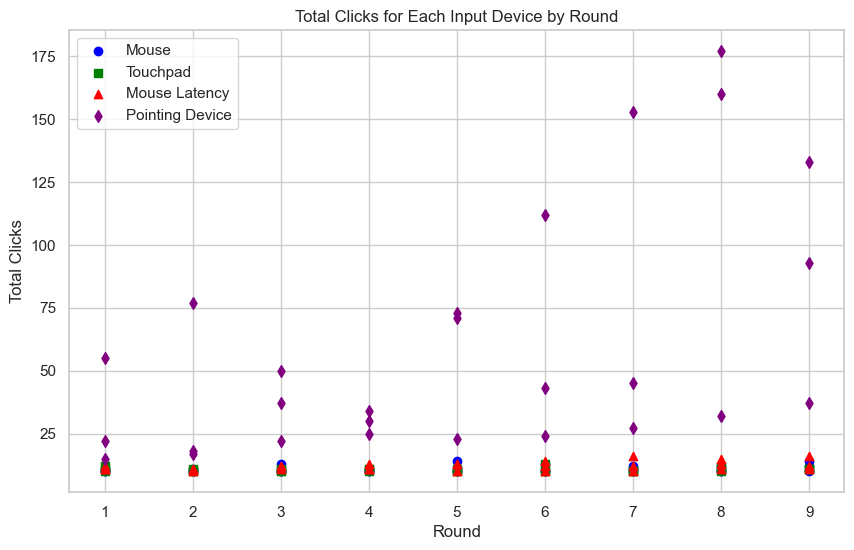

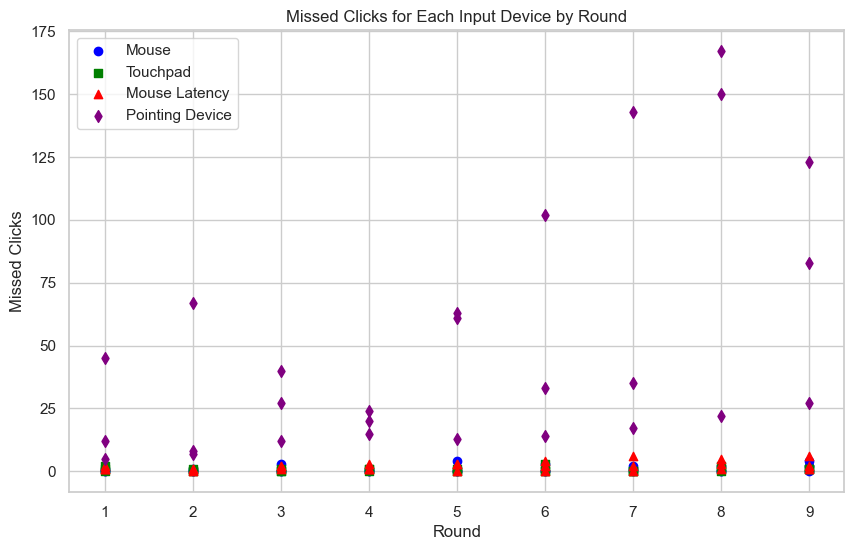

In [155]:
#total clicks
plt.figure(figsize=(10, 6))
plt.scatter(mouse_data['Round'], mouse_data['Total Clicks'], label='Mouse', color='blue', marker='o')
plt.scatter(touchpad_data['Round'], touchpad_data['Total Clicks'], label='Touchpad', color='green', marker='s')
plt.scatter(mouselatency_data['Round'], mouselatency_data['Total Clicks'], label='Mouse Latency', color='red', marker='^')
plt.scatter(pointing_data['Round'], pointing_data['Total Clicks'], label='Pointing Device', color='purple', marker='d')

# Add labels and title
plt.xlabel('Round')
plt.ylabel('Total Clicks')
plt.title('Total Clicks for Each Input Device by Round')
plt.legend()
plt.grid(True)
plt.show()

#---------
#misses
plt.figure(figsize=(10, 6))
plt.scatter(mouse_data['Round'], mouse_data['Missed Clicks'], label='Mouse', color='blue', marker='o')
plt.scatter(touchpad_data['Round'], touchpad_data['Missed Clicks'], label='Touchpad', color='green', marker='s')
plt.scatter(mouselatency_data['Round'], mouselatency_data['Missed Clicks'], label='Mouse Latency', color='red', marker='^')
plt.scatter(pointing_data['Round'], pointing_data['Missed Clicks'], label='Pointing Device', color='purple', marker='d')

# Add labels and title
plt.xlabel('Round')
plt.ylabel('Missed Clicks')
plt.title('Missed Clicks for Each Input Device by Round')
plt.legend()
plt.grid(True)
plt.show()

# Problems that occurred
### Pointing Device :
Accurate tracking worked pretty fast but getting an intuitive easy to use clicking method was not as easy the palm solution is satisfactory yet it usually slightly alters the position of the index finger which can lead to cursor movement during clicking reducing accuracy, further more if one doesn't lift the fingers high enough after clicking unwanted clicks can be detected, this is likely the reason for the much lower accuracy. Also arm fatigue set in during the study as holding your hand up for several minutes can be strenuous, although historical data indicates germans to be better at such hand poses so further research with a more ethnically diverse participant pool should be conducted. Also, the pointing detection lags a bit.

### Study: 
Participant 1 had problems reaching the lowest targets with the pointing device, so that task had to be repeated with the participant being farther away from the webcam which solved the issue.




